In [1]:
#from google.colab import drive
#drive.mount("/content/drive/")

### __CIFAR10 VERİ SETİ__

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [3]:
(x, y), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [4]:
y

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
y = y.reshape(-1,)
y_test = y_test.reshape(-1,)

In [6]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [7]:
x=x/255
x_test=x_test/255

In [8]:
print(x.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


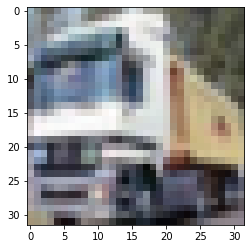

In [67]:
plt.imshow(x[1]);

In [11]:
x_train, x_val, y_train, y_val = train_test_split(
    x,
    y,
    test_size = 0.2,
    stratify=y,
    random_state=42
)

In [12]:
print(x_train.shape)
print(x_val.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)


In [13]:
dict_val_acc = {}

def plot_acc_loss(history):
    plt.figure(figsize=(6,4))

    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.legend(["train_acc", "val_acc"], loc="upper left")
   
    plt.show()

### __MODELS__

In [14]:
def CNN_1():
    input = Input(shape = x_train[0].shape)

    x = Conv2D(32, (3,3), activation="relu")(input)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Conv2D(32, (3,3), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Conv2D(32, (3,3), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Flatten()(x)
    x = Dense(256, activation="relu")(x)
    output = Dense(10, activation="softmax")(x)

    model = Model(input, output)

    return model

In [15]:
model_1 = CNN_1()

model_1.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_1 = model_1.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=64 ,epochs=30)

Epoch 1/30
625/625 [==============================] - 13s 5ms/step - loss: 1.6838 - accuracy: 0.3800 - val_loss: 1.4010 - val_accuracy: 0.4930
Epoch 2/30
625/625 [==============================] - 3s 5ms/step - loss: 1.3478 - accuracy: 0.5151 - val_loss: 1.3381 - val_accuracy: 0.5370
Epoch 3/30
625/625 [==============================] - 3s 5ms/step - loss: 1.2158 - accuracy: 0.5660 - val_loss: 1.2159 - val_accuracy: 0.5689
Epoch 4/30
625/625 [==============================] - 3s 4ms/step - loss: 1.1252 - accuracy: 0.6013 - val_loss: 1.1216 - val_accuracy: 0.6097
Epoch 5/30
625/625 [==============================] - 3s 4ms/step - loss: 1.0527 - accuracy: 0.6303 - val_loss: 1.0750 - val_accuracy: 0.6195
Epoch 6/30
625/625 [==============================] - 3s 4ms/step - loss: 1.0021 - accuracy: 0.6471 - val_loss: 1.0256 - val_accuracy: 0.6433
Epoch 7/30
625/625 [==============================] - 3s 4ms/step - loss: 0.9569 - accuracy: 0.6652 - val_loss: 1.0498 - val_accuracy: 0.6390
Epoch

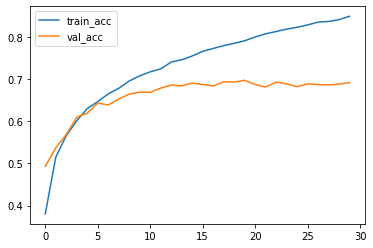

In [16]:
plot_acc_loss(history_1)

In [17]:
dict_val_acc["model_1"] = max(history_1.history["val_accuracy"])
dict_val_acc

{'model_1': 0.6973999738693237}

In [18]:
def CNN_2():
    input = Input(shape = x_train[0].shape)

    x = Conv2D(32, (3,3), activation="relu")(input)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.2)(x)
    x = Conv2D(32, (3,3), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.2)(x)
    x = Conv2D(32, (3,3), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Flatten()(x)
    x = Dense(256, activation="relu")(x)
    output = Dense(10, activation="softmax")(x)

    model = Model(input, output)

    return model


In [19]:
model_2 = CNN_2()


model_2.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_2 = model_2.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=64, epochs=30)

Epoch 1/30
625/625 [==============================] - 4s 5ms/step - loss: 1.7653 - accuracy: 0.3457 - val_loss: 1.4933 - val_accuracy: 0.4689
Epoch 2/30
625/625 [==============================] - 3s 4ms/step - loss: 1.4279 - accuracy: 0.4831 - val_loss: 1.3276 - val_accuracy: 0.5357
Epoch 3/30
625/625 [==============================] - 3s 5ms/step - loss: 1.2871 - accuracy: 0.5401 - val_loss: 1.1996 - val_accuracy: 0.5781
Epoch 4/30
625/625 [==============================] - 3s 4ms/step - loss: 1.1958 - accuracy: 0.5754 - val_loss: 1.1088 - val_accuracy: 0.6152
Epoch 5/30
625/625 [==============================] - 3s 4ms/step - loss: 1.1268 - accuracy: 0.6005 - val_loss: 1.0564 - val_accuracy: 0.6346
Epoch 6/30
625/625 [==============================] - 3s 5ms/step - loss: 1.0729 - accuracy: 0.6186 - val_loss: 1.0339 - val_accuracy: 0.6313
Epoch 7/30
625/625 [==============================] - 3s 4ms/step - loss: 1.0318 - accuracy: 0.6332 - val_loss: 0.9880 - val_accuracy: 0.6517
Epoch 

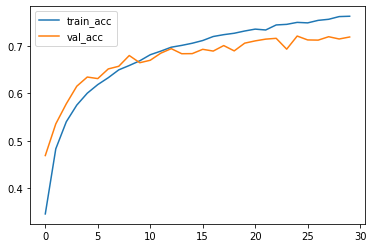

In [20]:
plot_acc_loss(history_2)

In [21]:
dict_val_acc["model_2"] = max(history_2.history["val_accuracy"])
dict_val_acc

{'model_1': 0.6973999738693237, 'model_2': 0.7210999727249146}

In [22]:
def CNN_3():
    input = Input(shape = x_train[0].shape)

    x = Conv2D(32, (5,5), padding="same",activation="relu")(input)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.2)(x)
    x = Conv2D(32, (5,5), padding="same",activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.2)(x)
    x = Conv2D(32, (5,5), padding="same",activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.2)(x)
    x = Flatten()(x)
    x = Dense(256, activation="relu")(x)
    output = Dense(10, activation="softmax")(x)

    model = Model(input, output)

    return model


In [23]:
model_3 = CNN_3()


model_3.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_3 = model_3.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=64, epochs=30)

Epoch 1/30
625/625 [==============================] - 4s 5ms/step - loss: 1.6784 - accuracy: 0.3823 - val_loss: 1.3723 - val_accuracy: 0.4999
Epoch 2/30
625/625 [==============================] - 3s 5ms/step - loss: 1.3293 - accuracy: 0.5205 - val_loss: 1.2463 - val_accuracy: 0.5634
Epoch 3/30
625/625 [==============================] - 3s 5ms/step - loss: 1.1748 - accuracy: 0.5801 - val_loss: 1.1272 - val_accuracy: 0.5948
Epoch 4/30
625/625 [==============================] - 3s 5ms/step - loss: 1.0844 - accuracy: 0.6145 - val_loss: 1.0544 - val_accuracy: 0.6217
Epoch 5/30
625/625 [==============================] - 3s 5ms/step - loss: 1.0056 - accuracy: 0.6416 - val_loss: 0.9577 - val_accuracy: 0.6562
Epoch 6/30
625/625 [==============================] - 3s 5ms/step - loss: 0.9565 - accuracy: 0.6609 - val_loss: 0.9348 - val_accuracy: 0.6675
Epoch 7/30
625/625 [==============================] - 3s 5ms/step - loss: 0.9019 - accuracy: 0.6801 - val_loss: 0.8557 - val_accuracy: 0.6976
Epoch 

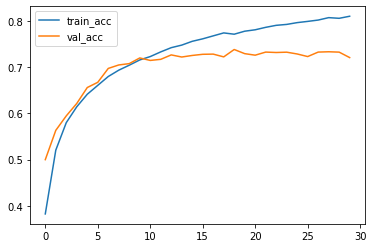

In [24]:
plot_acc_loss(history_3)

In [25]:
dict_val_acc["model_3"] = max(history_3.history["val_accuracy"])
dict_val_acc

{'model_1': 0.6973999738693237,
 'model_2': 0.7210999727249146,
 'model_3': 0.7386000156402588}

In [26]:
def CNN_4():
    input = Input(shape = x_train[0].shape)

    x = Conv2D(32, (3,3), activation="relu")(input)
    x = Conv2D(32, (3,3), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Conv2D(64, (3,3), activation="relu")(x)
    x = Conv2D(64, (3,3), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Conv2D(128, (3,3), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Flatten()(x)
    x = Dense(256, activation="relu")(x)
    output = Dense(10, activation="softmax")(x)

    model = Model(input, output)

    return model

In [27]:
model_4 = CNN_4()

model_4.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_4 = model_4.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=64, epochs=30)

Epoch 1/30
625/625 [==============================] - 5s 7ms/step - loss: 1.6957 - accuracy: 0.3654 - val_loss: 1.4051 - val_accuracy: 0.4856
Epoch 2/30
625/625 [==============================] - 4s 6ms/step - loss: 1.2788 - accuracy: 0.5410 - val_loss: 1.2285 - val_accuracy: 0.5636
Epoch 3/30
625/625 [==============================] - 4s 6ms/step - loss: 1.1156 - accuracy: 0.6065 - val_loss: 1.0902 - val_accuracy: 0.6151
Epoch 4/30
625/625 [==============================] - 4s 6ms/step - loss: 1.0021 - accuracy: 0.6479 - val_loss: 1.0029 - val_accuracy: 0.6469
Epoch 5/30
625/625 [==============================] - 4s 6ms/step - loss: 0.9043 - accuracy: 0.6807 - val_loss: 0.9925 - val_accuracy: 0.6555
Epoch 6/30
625/625 [==============================] - 4s 6ms/step - loss: 0.8308 - accuracy: 0.7087 - val_loss: 0.9281 - val_accuracy: 0.6775
Epoch 7/30
625/625 [==============================] - 4s 6ms/step - loss: 0.7605 - accuracy: 0.7323 - val_loss: 0.9519 - val_accuracy: 0.6767
Epoch 

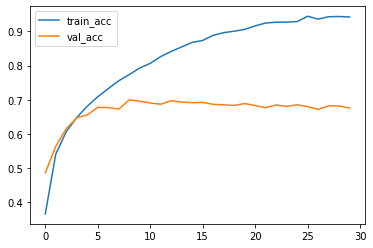

In [28]:
plot_acc_loss(history_4)

In [29]:
dict_val_acc["model_4"] = max(history_4.history["val_accuracy"])
dict_val_acc

{'model_1': 0.6973999738693237,
 'model_2': 0.7210999727249146,
 'model_3': 0.7386000156402588,
 'model_4': 0.6992999911308289}

In [30]:
def CNN_5():
    input = Input(shape = x_train[0].shape)

    x = Conv2D(32, (3,3), activation="relu")(input)
    x = Conv2D(32, (3,3), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.25)(x)
    x = Conv2D(64, (3,3), activation="relu")(x)
    x = Conv2D(64, (3,3), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.25)(x)
    x = Conv2D(128, (3,3), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dense(256, activation="relu")(x)
    output = Dense(10, activation="softmax")(x)

    model = Model(input, output)

    return model

In [31]:
model_5 = CNN_5()


model_5.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_5 = model_5.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=64, epochs=30)

Epoch 1/30
625/625 [==============================] - 5s 7ms/step - loss: 1.7897 - accuracy: 0.3262 - val_loss: 1.4359 - val_accuracy: 0.4855
Epoch 2/30
625/625 [==============================] - 4s 6ms/step - loss: 1.4061 - accuracy: 0.4927 - val_loss: 1.2446 - val_accuracy: 0.5457
Epoch 3/30
625/625 [==============================] - 4s 7ms/step - loss: 1.2639 - accuracy: 0.5464 - val_loss: 1.1266 - val_accuracy: 0.6031
Epoch 4/30
625/625 [==============================] - 5s 8ms/step - loss: 1.1631 - accuracy: 0.5850 - val_loss: 1.0531 - val_accuracy: 0.6253
Epoch 5/30
625/625 [==============================] - 7s 11ms/step - loss: 1.0972 - accuracy: 0.6113 - val_loss: 1.0054 - val_accuracy: 0.6489
Epoch 6/30
625/625 [==============================] - 5s 9ms/step - loss: 1.0433 - accuracy: 0.6306 - val_loss: 0.9515 - val_accuracy: 0.6642
Epoch 7/30
625/625 [==============================] - 4s 7ms/step - loss: 1.0047 - accuracy: 0.6457 - val_loss: 0.9319 - val_accuracy: 0.6767
Epoch

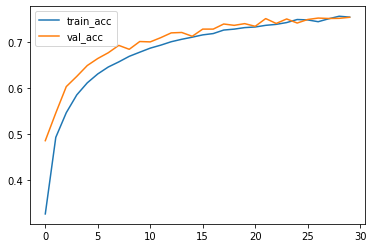

In [32]:
plot_acc_loss(history_5)

In [33]:
dict_val_acc["model_5"] = max(history_5.history["val_accuracy"])
dict_val_acc

{'model_1': 0.6973999738693237,
 'model_2': 0.7210999727249146,
 'model_3': 0.7386000156402588,
 'model_4': 0.6992999911308289,
 'model_5': 0.7537999749183655}

In [34]:
def CNN_6():
    input = Input(shape = x_train[0].shape)

    x = Conv2D(32, (3,3), activation="relu")(input)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3,3), activation="relu")(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.25)(x)
    x = Conv2D(64, (3,3), activation="relu")(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3,3), activation="relu")(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.25)(x)
    x = Conv2D(128, (3,3), activation="relu")(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dense(512, activation="relu")(x)
    x = BatchNormalization()(x)
    output = Dense(10, activation="softmax")(x)

    model = Model(input, output)

    return model

In [35]:
model_6 = CNN_6()


model_6.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_6 = model_6.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=64, epochs=30)

Epoch 1/30
625/625 [==============================] - 6s 8ms/step - loss: 1.7004 - accuracy: 0.3949 - val_loss: 1.4632 - val_accuracy: 0.4698
Epoch 2/30
625/625 [==============================] - 5s 8ms/step - loss: 1.2940 - accuracy: 0.5329 - val_loss: 1.2848 - val_accuracy: 0.5511
Epoch 3/30
625/625 [==============================] - 5s 7ms/step - loss: 1.1429 - accuracy: 0.5958 - val_loss: 1.2516 - val_accuracy: 0.5607
Epoch 4/30
625/625 [==============================] - 5s 8ms/step - loss: 1.0366 - accuracy: 0.6334 - val_loss: 1.0988 - val_accuracy: 0.6130
Epoch 5/30
625/625 [==============================] - 5s 8ms/step - loss: 0.9635 - accuracy: 0.6595 - val_loss: 1.0156 - val_accuracy: 0.6454
Epoch 6/30
625/625 [==============================] - 5s 7ms/step - loss: 0.9046 - accuracy: 0.6796 - val_loss: 0.9469 - val_accuracy: 0.6761
Epoch 7/30
625/625 [==============================] - 5s 8ms/step - loss: 0.8623 - accuracy: 0.6973 - val_loss: 0.9137 - val_accuracy: 0.6868
Epoch 

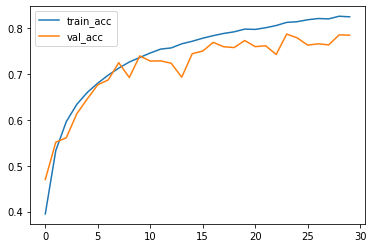

In [36]:
plot_acc_loss(history_6)

In [37]:
dict_val_acc["model_6"] = max(history_6.history["val_accuracy"])
dict_val_acc

{'model_1': 0.6973999738693237,
 'model_2': 0.7210999727249146,
 'model_3': 0.7386000156402588,
 'model_4': 0.6992999911308289,
 'model_5': 0.7537999749183655,
 'model_6': 0.7865999937057495}

In [38]:
def CNN_7():
    input = Input(shape = x_train[0].shape)

    x = Conv2D(32, (3,3), padding="same", activation="relu")(input)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3,3), padding="same", activation="relu")(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.3)(x) 
    x = Conv2D(64, (3,3), padding="same", activation="relu")(x)
    x = BatchNormalization()(x)
    x = Conv2D(64, (3,3), padding="same", activation="relu")(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.3)(x)
    x = Conv2D(128, (3,3), padding="same", activation="relu")(x)
    x = BatchNormalization()(x)
    x = Conv2D(128, (3,3), padding="same", activation="relu")(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.5)(x)
    x = Flatten()(x)
    x = Dense(512, activation="relu")(x)
    x = BatchNormalization()(x)
    output = Dense(10, activation="softmax")(x)

    model = Model(input, output)

    return model

In [39]:
model_7 = CNN_7()

model_7.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_7 = model_7.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=64, epochs=30)

Epoch 1/30
625/625 [==============================] - 8s 11ms/step - loss: 1.5430 - accuracy: 0.4622 - val_loss: 1.4224 - val_accuracy: 0.5165
Epoch 2/30
625/625 [==============================] - 6s 10ms/step - loss: 1.0860 - accuracy: 0.6144 - val_loss: 1.0456 - val_accuracy: 0.6426
Epoch 3/30
625/625 [==============================] - 6s 10ms/step - loss: 0.8969 - accuracy: 0.6825 - val_loss: 0.7618 - val_accuracy: 0.7327
Epoch 4/30
625/625 [==============================] - 6s 10ms/step - loss: 0.7889 - accuracy: 0.7221 - val_loss: 0.7409 - val_accuracy: 0.7408
Epoch 5/30
625/625 [==============================] - 7s 11ms/step - loss: 0.7104 - accuracy: 0.7516 - val_loss: 0.8776 - val_accuracy: 0.7108
Epoch 6/30
625/625 [==============================] - 8s 13ms/step - loss: 0.6447 - accuracy: 0.7733 - val_loss: 0.6300 - val_accuracy: 0.7782
Epoch 7/30
625/625 [==============================] - 6s 10ms/step - loss: 0.5917 - accuracy: 0.7928 - val_loss: 0.6022 - val_accuracy: 0.7936

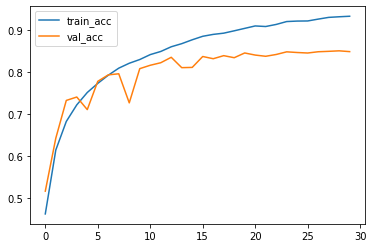

In [40]:
plot_acc_loss(history_7)

In [41]:
dict_val_acc["model_7"] = max(history_7.history["val_accuracy"])
dict_val_acc

{'model_1': 0.6973999738693237,
 'model_2': 0.7210999727249146,
 'model_3': 0.7386000156402588,
 'model_4': 0.6992999911308289,
 'model_5': 0.7537999749183655,
 'model_6': 0.7865999937057495,
 'model_7': 0.8508999943733215}

In [42]:
# MODEL 7 DOĞRULAMA İÇİN EN YÜKSEK BAŞARIYI VERİR. BU MODELİ BİR DE TEST SETİNDE DENEYELİM.

In [43]:
test_loss, test_acc = model_7.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: ", round(test_acc, 4))

Test Accuracy:  0.841


In [44]:
pred = model_7.predict(x_test)

313/313 [==============================] - 2s 4ms/step


In [69]:
pred

array([[4.6870150e-07, 7.3434711e-07, 7.1258284e-09, 1.1676822e-07,
        1.2975810e-09, 3.7113568e-09, 2.9745564e-10, 7.0922556e-07,
        8.7581730e-06, 9.9998927e-01]], dtype=float32)

### __EN İYİ MODELİ SEÇME VE GÖRSELLEŞTİRME__

In [45]:
def heatmap(cm):
  plt.figure(figsize=(16,12))
  ax = sns.heatmap(cm, xticklabels=classes, yticklabels=classes, annot=True, fmt="g")
  ax.set(xlabel="Predicted labels", ylabel="True labels")
  ax.xaxis.tick_top()

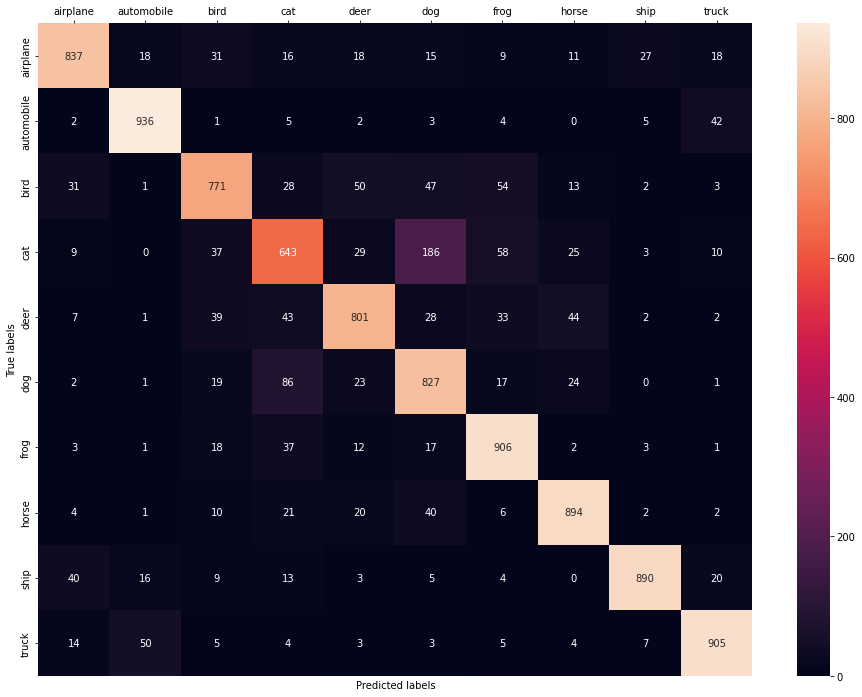

In [46]:
y_pred_classes = np.argmax(pred, axis=1) 

cm = confusion_matrix(y_test, y_pred_classes) 

heatmap(cm)

In [48]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1000
           1       0.91      0.94      0.92      1000
           2       0.82      0.77      0.79      1000
           3       0.72      0.64      0.68      1000
           4       0.83      0.80      0.82      1000
           5       0.71      0.83      0.76      1000
           6       0.83      0.91      0.86      1000
           7       0.88      0.89      0.89      1000
           8       0.95      0.89      0.92      1000
           9       0.90      0.91      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



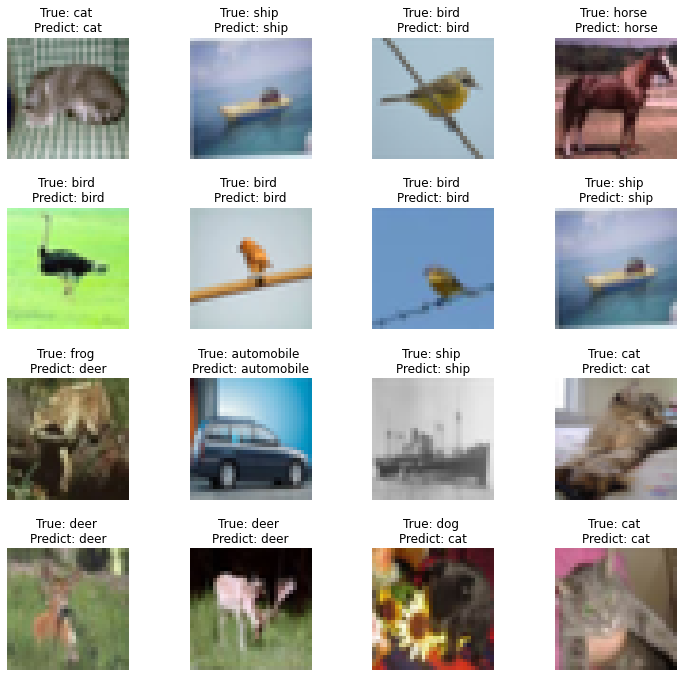

In [49]:
fig, axes = plt.subplots(4, 4, figsize=(12,12))
axes = axes.ravel()

import random


for i in np.arange(0, 16):
    j=random.randint(0,9999)
    axes[i].imshow(x_test[j])
    axes[i].set_title("True: %s \nPredict: %s" % (classes[y_test[j]], classes[y_pred_classes[j]]))
    axes[i].axis("off")
    plt.subplots_adjust(wspace=0.5)

### __30 ADET TEST RESMİ İÇİN EN YÜKSEK BENZERLİĞE SAHİP 5 SINIFI BULMA__

In [63]:
dict_for_img = {}

for i in range(10):
  k=0
  temp=[]
  name = str(i)
  while(k<3):
    j=random.randint(0,9999)
    if i == y_test[j]:
      temp.append(x_test[j])
      k+=1
  
  dict_for_img[name] = temp



True class: airplane
Most similar classes: ['airplane', 'automobile', 'bird', 'truck', 'frog']


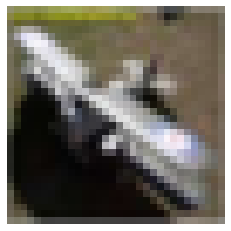



True class: airplane
Most similar classes: ['frog', 'truck', 'horse', 'bird', 'ship']


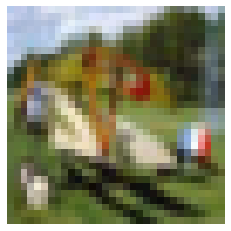



True class: airplane
Most similar classes: ['airplane', 'truck', 'automobile', 'ship', 'deer']


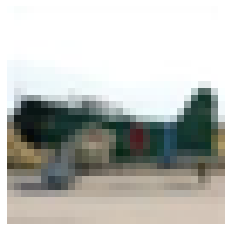



True class: automobile
Most similar classes: ['automobile', 'ship', 'airplane', 'truck', 'deer']


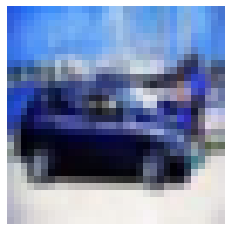



True class: automobile
Most similar classes: ['automobile', 'truck', 'airplane', 'ship', 'deer']


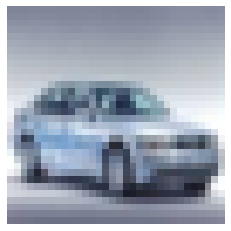



True class: automobile
Most similar classes: ['automobile', 'truck', 'airplane', 'ship', 'cat']


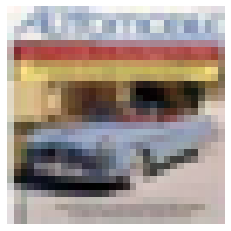



True class: bird
Most similar classes: ['bird', 'airplane', 'frog', 'cat', 'dog']


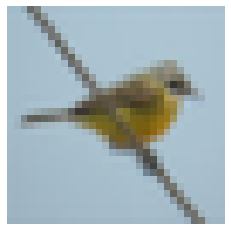



True class: bird
Most similar classes: ['airplane', 'bird', 'ship', 'deer', 'automobile']


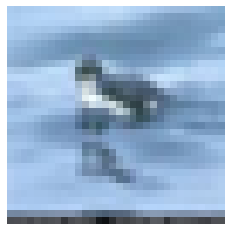



True class: bird
Most similar classes: ['bird', 'frog', 'cat', 'horse', 'dog']


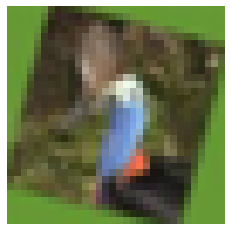



True class: cat
Most similar classes: ['cat', 'dog', 'horse', 'frog', 'automobile']


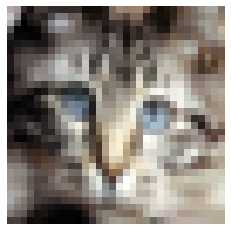



True class: cat
Most similar classes: ['dog', 'cat', 'deer', 'horse', 'airplane']


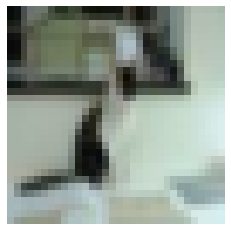



True class: cat
Most similar classes: ['cat', 'frog', 'dog', 'bird', 'deer']


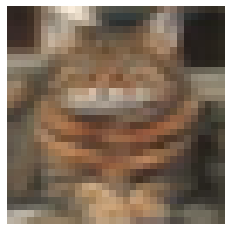



True class: deer
Most similar classes: ['deer', 'bird', 'frog', 'cat', 'dog']


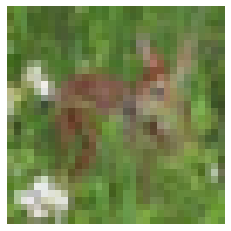



True class: deer
Most similar classes: ['deer', 'horse', 'cat', 'dog', 'bird']


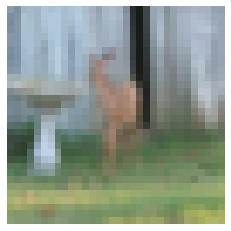



True class: deer
Most similar classes: ['deer', 'dog', 'cat', 'automobile', 'frog']


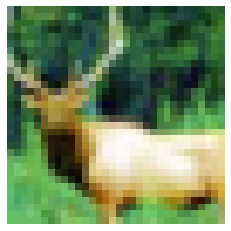



True class: dog
Most similar classes: ['dog', 'cat', 'deer', 'horse', 'frog']


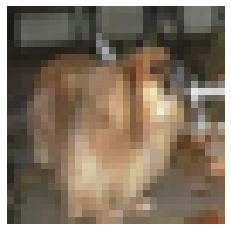



True class: dog
Most similar classes: ['dog', 'deer', 'bird', 'ship', 'airplane']


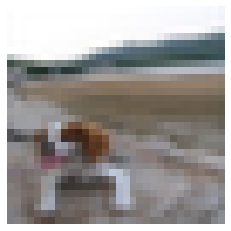



True class: dog
Most similar classes: ['dog', 'horse', 'cat', 'bird', 'deer']


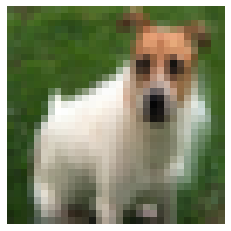



True class: frog
Most similar classes: ['cat', 'frog', 'bird', 'dog', 'horse']


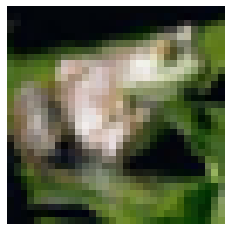



True class: frog
Most similar classes: ['frog', 'truck', 'cat', 'automobile', 'ship']


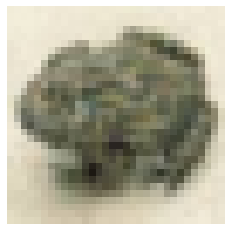



True class: frog
Most similar classes: ['frog', 'cat', 'dog', 'bird', 'deer']


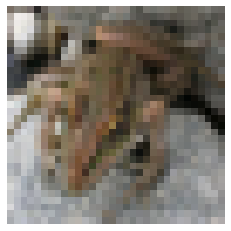



True class: horse
Most similar classes: ['horse', 'bird', 'deer', 'dog', 'cat']


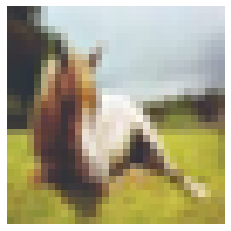



True class: horse
Most similar classes: ['horse', 'deer', 'dog', 'cat', 'airplane']


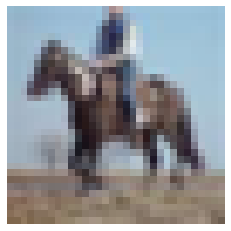



True class: horse
Most similar classes: ['horse', 'truck', 'deer', 'dog', 'airplane']


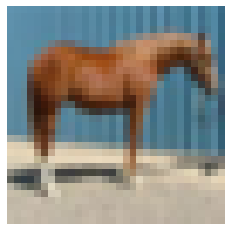



True class: ship
Most similar classes: ['ship', 'automobile', 'truck', 'airplane', 'deer']


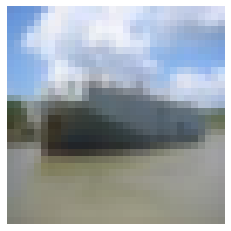



True class: ship
Most similar classes: ['ship', 'cat', 'frog', 'deer', 'bird']


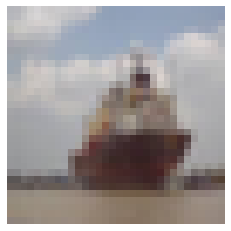



True class: ship
Most similar classes: ['ship', 'automobile', 'airplane', 'truck', 'bird']


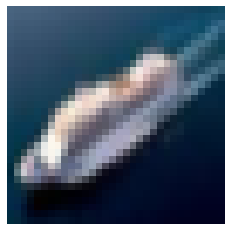



True class: truck
Most similar classes: ['truck', 'automobile', 'horse', 'frog', 'airplane']


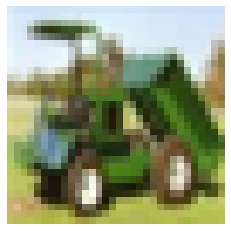



True class: truck
Most similar classes: ['truck', 'automobile', 'bird', 'ship', 'horse']


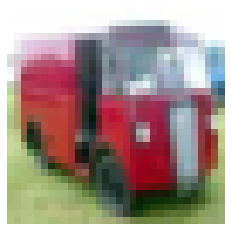



True class: truck
Most similar classes: ['truck', 'ship', 'automobile', 'horse', 'airplane']


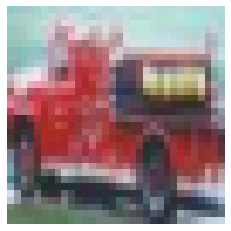

In [64]:
y_sample_real = []
y_sample_pred = []

for i in dict_for_img.keys():

  for j in range(3):
    print("\n")
    temp = []
    img = np.expand_dims(dict_for_img[i][j],0)  

    pred = model_7.predict(img, verbose=0)
    y_sample_real.append(i)
    y_sample_pred.append(np.argmax(pred))

    sorted = np.argsort(-1*pred)

    for k in range(5):
      temp.append(sorted[0][k])

    for k in range(5):
      temp[k] = classes[temp[k]]
  
    
    print("True class: {}\nMost similar classes: {}".format(classes[int(i)], temp))


    plt.imshow(dict_for_img[i][j])
    plt.axis("off")
    plt.show()

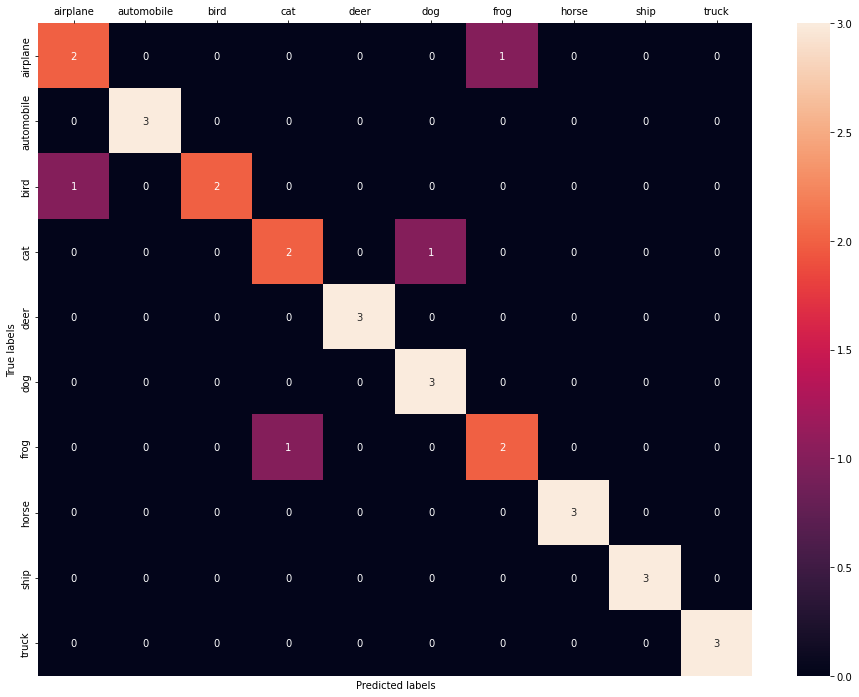

In [68]:
for i in range(len(y_sample_real)):
    y_sample_real[i] = int(y_sample_real[i])

y_sample_real = np.array(y_sample_real, dtype="uint8")

cm = confusion_matrix(y_sample_real, y_sample_pred) 

heatmap(cm)